## 📌 01. 딥러닝 모델의 학습 방법

### 💡 딥러닝 모델이란
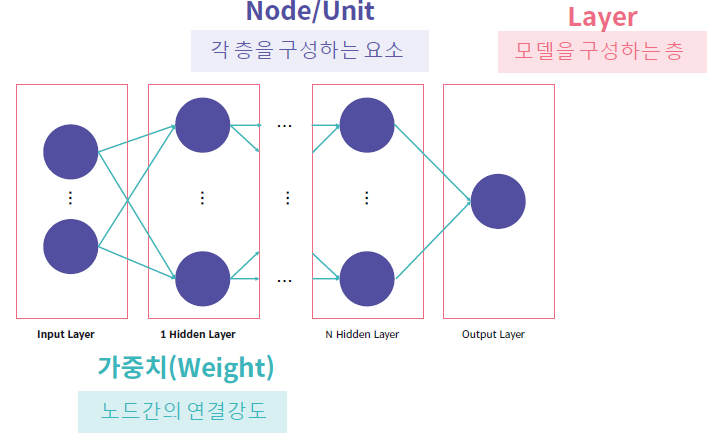

### 💡 딥러닝 모델 학습 방법
- **예측값**과 **실제값** 간의 **오차값**을 **최소화**하기 위해 **오차값**을 **최소화**하는 모델의 인자를 찾는 알고리즘을 적용
- **Loss Function**을 최소화하는 **가중치**를 찾기 위해 **최적화** 알고리즘을 적용

### 💡 딥러닝 모델이 예측값을 구하는 방식
#### 순전파 (Forward propagation)
입력 값을 바탕으로 출력 값을 계산하는 과정
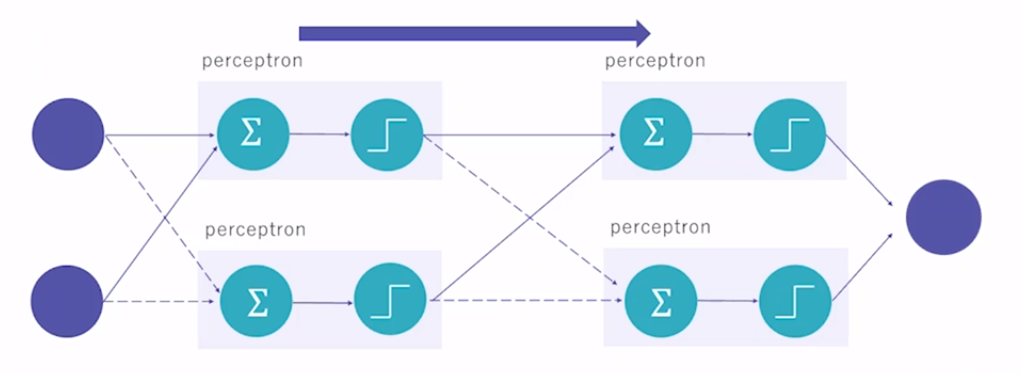

### 💡 최적화 방식 살펴보기
순전파를 이용하면 **예측값과 실제값 간의 오차값**을 구하여 **Loss Function**을 구할 수 있음

그렇다면 어떻게 최적화를 해야할까?

 **👉 경사 하강법(Gradient descent)을 사용**
 
### 💡 경사 하강법(Gradient descent)
- **가중치**를 **Loss function** 값이 작아지게 업데이트하는 방법
- **가중치**는 **Gradient 값(미분 값)**을 사용하여 업데이트를 수행함
- **Gradient 값**은 각 가중치마다 정해지며, **역전파(Backpropagation)**을 통하여 구할 수 있음
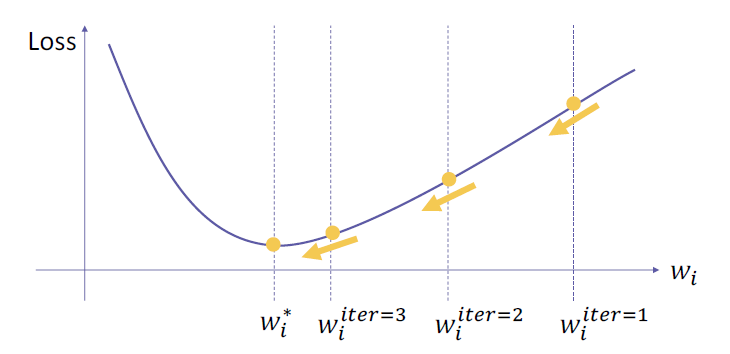

### 💡 역전파 (Backpropagation)
Forward propagation의 반대 방향으로 이루어지는 과정
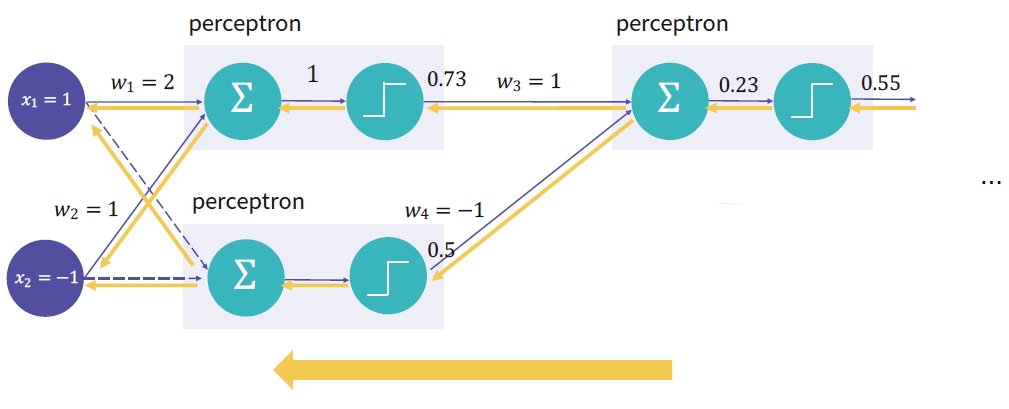

### 💡 딥러닝 모델의 학습 방법 정리
#### 👀 딥러닝 모델의 학습 순서
1. 학습용 feature 데이터를 입력하여 예측값 구하기 **(순전파)**
2. 예측값과 실제값 사이의 오차 구하기 **(Loss 계산)**
3. Loss를 줄일 수 있는 가중치 업데이트 하기 **(역전파)**
4. 1~3번 반복으로 Loss를 최소로 하는 가중치 얻기

## 📌 02. 텐서플로우로 딥러닝 구현 - 데이터 전처리
###  💡 텐서플로우(TensorFlow)
- 유연하고, 효율적이며, 확장성 있는 딥러닝 프레임워크
- 대형 클러스터 컴퓨터부터 스마트폰까지 다양한 디바이스에서 동작 가능

### 💡 딥러닝 모델 구현 순서
1. 데이터 전 처리하기
2. 딥러닝 모델 구축하기
3. 모델 학습시키기
4. 평가 및 예측하기

### 💡 1. 데이터 전 처리하기
Tensorflow 딥러닝 모델은 **Tensor 형태의 데이터**를 입력 받음

#### 👀 Tensor란
다차원 배열로서 tensorflow에서 사용하는 객체
image

### tf.data.Dataset
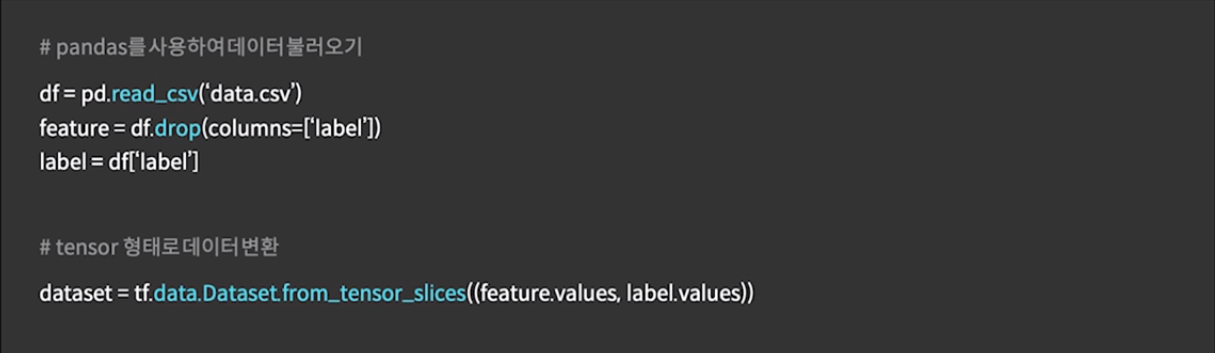
Dataset API를 사용하여 딥러닝 모델 용 Dataset 생성

### Epoch와 Batch
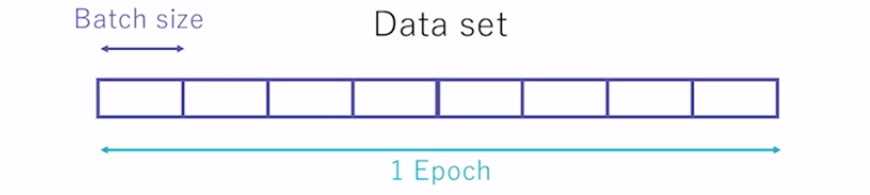
딥러닝에 사용하는 데이터는 추가적인 전 처리 작업이 필요 👉 **Epoch, Batch**

```
Epoch: 한 번의 epoch는 전체 데이터 셋에 대해 한 번 학습을 완료한 상태
Batch: 나눠진 데이터 셋 (보통 mini-batch라고 표현)
Iteration: epoch을 나누어서 실행하는 횟수 의미
```

### tf.data.Dataset
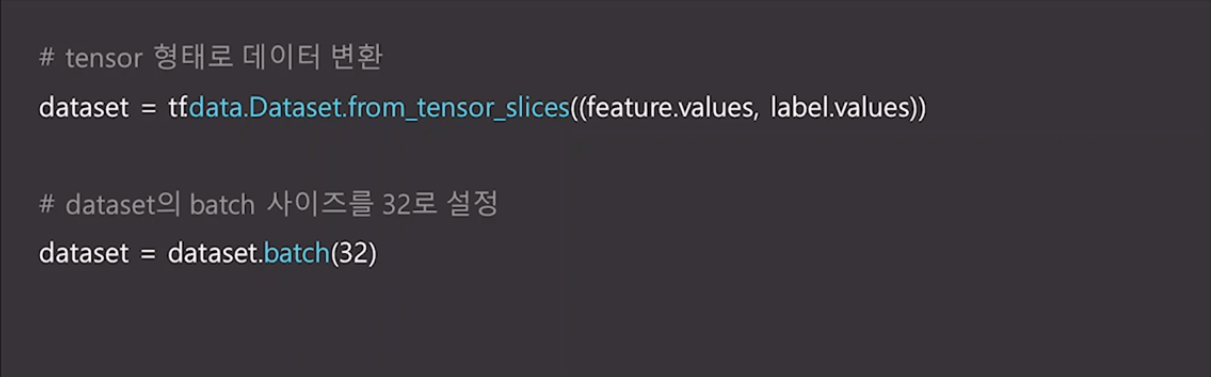
feature.values : numpy.array 형태

### 👩‍💻 예제
신경망 이용한 광고 비용에 따른 수익률 예측

In [6]:
import pandas as pd
import numpy  as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

np.random.seed(100)
tf.random.set_seed(100)

# 데이터를 DataFrame 형태로 불러 옵니다.
df = pd.read_csv("data/Advertising.csv")

# 의미없는 변수는 삭제합니다.
df = df.drop(columns=['Unnamed: 0'])

# DataFrame 데이터 샘플 5개를 출력합니다.
print('원본 데이터 샘플 :')
print(df.head(),'\n')

원본 데이터 샘플 :
      FB    TV  Newspaper  Sales
0  230.1  37.8       69.2   22.1
1   44.5  39.3       45.1   10.4
2   17.2  45.9       69.3    9.3
3  151.5  41.3       58.5   18.5
4  180.8  10.8       58.4   12.9 



#### 1. Sales 변수는 label 데이터로 Y에 저장하고 나머진 X에 저장

In [8]:
X = df.drop('Sales', axis=1)
Y = df.Sales

train_X, test_X, train_Y, test_Y = train_test_split(X, Y,
                                                   test_size = .3)

train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((140, 3), (60, 3), (140,), (60,))

#### 2. 학습용 데이터를 tf.data.Dataset 형태로 변환
from_tensor_slices 함수를 사용하여 변환하고 batch를 수행

In [18]:
train_ds = tf.data.Dataset.from_tensor_slices((train_X.values, train_Y.values))
train_ds = train_ds.shuffle(len(train_X)).batch(batch_size = 5)

# 하나의 batch를 뽑아서 feature와 label로 분리
[(train_features_batch, label_batch)] = train_ds.take(1)

# batch 데이터 출력
print('FB, TV, Newspaper batch 데이터:\n',train_features_batch)
print('\nSales batch 데이터:\n',label_batch)

FB, TV, Newspaper batch 데이터:
 tf.Tensor(
[[ 25.   11.   29.7]
 [213.5  43.   33.8]
 [102.7  29.6   8.4]
 [234.5   3.4  84.8]
 [139.3  14.5  10.2]], shape=(5, 3), dtype=float64)

Sales batch 데이터:
 tf.Tensor([ 7.2 21.7 14.  11.9 13.4], shape=(5,), dtype=float64)


## 📌 03. 텐서플로우로 딥러닝 구현 - 모델 구현


### 💡 2. 딥러닝 모델 구축하기: 고수준 API 활용 👉 Keras
#### 👀 Keras란
텐서플로우의 패키지로 제공되는 고수준 API로 딥러닝 모델을 간단하고 빠르게 구현 가능

### 💡 딥러닝 모델 구축을 위한 Keras 메소드(1)
- 모델 클래스 객체 생성 : `tf.keras.models.Sequential()`
- 모델의 각 Layer 구성 : `tf.keras.layers.Dense(units, activation)`
    - units: 레이어 안의 Node의 수
    - activation: 적용할 activation 함수 설정
    
### 💡 Input Layer의 입력 형태 지정하기
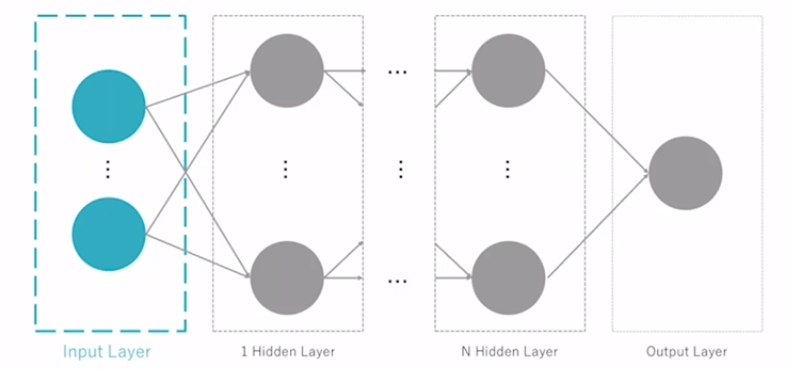
첫번째 즉, Input Layer는 입력 형태에 대한 정보를 필요로 함 👉 **input_shape** / **input_dim** 인자 설정하기

#### 모델 구축하기 코드 예시(1)
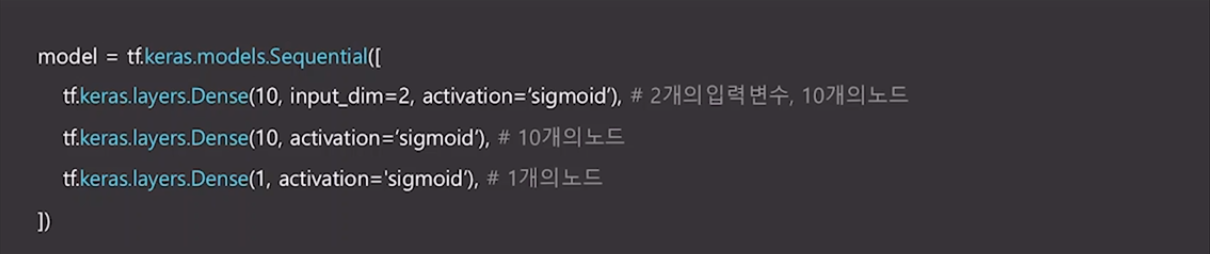

### 💡 딥러닝 모델 구축을 위한 Keras 메소드(2)
- 모델에 Layer 추가하기: `[model].add(tf.keras.layers.Dense(units, activation))`
    - units: 레이어 안의 Node의 수
    - activation: 적용할 activation 함수 설정
- 위의 코드 예시(1) 처럼 Sequential() 안에 layer 구성한 것과 같은 효과
    
#### 모델 구축하기 코드 예시(2)
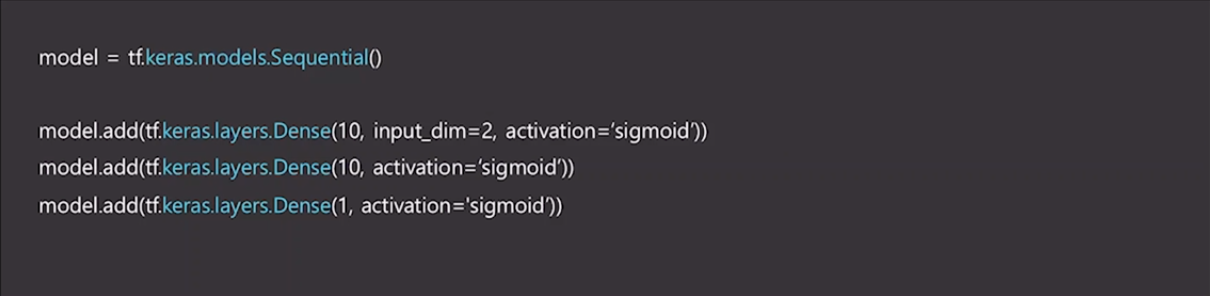

### 💡 3. 딥러닝 모델 학습시키기: Keras 메소드
- 모델 학습 방식 설정을 위한 함수: `[model].compile(optimizer, loss)`
    - optimizer: 모델 학습 최적화 방법 (adam, sgd, ...)
    - loss: 손실 함수 설정
- 모델을 학습시키기 위한 함수: `[model].fit(x, y)`
    - x: 학습 데이터
    - y: 학습 데이터의 label
    
#### 모델 학습시키기 코드 예시(1)
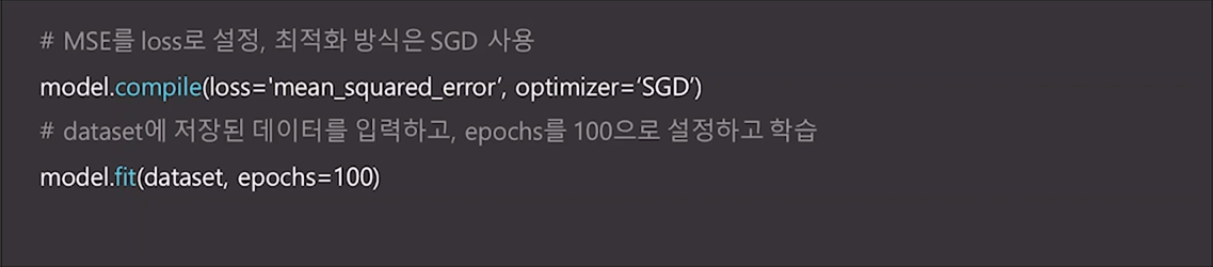

### 💡 4. 평가 및 예측하기: Keras 메소드
- 모델을 평가하기 위한 메소드: `[model].evaluate(x, y)
    - x: 테스트 데이터
    - y: 테스트 데이터의 label
- 모델로 예측을 수행하기 위한 함수: `[model].predict(x)
    - x: 예측하고자 하는 데이터
    
#### 모델 학습시키기 코드 예시(2)
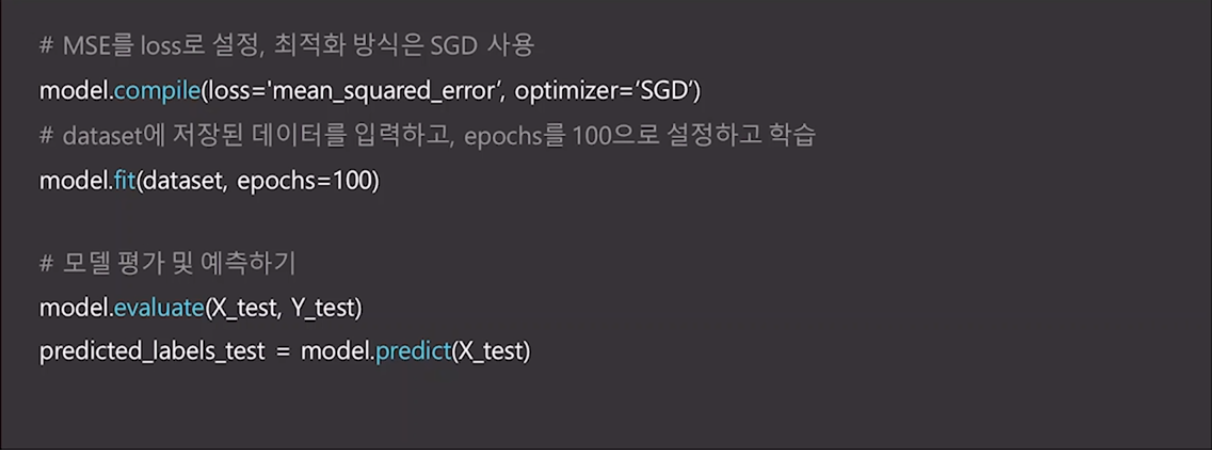

###  👩‍💻 예제
텐서플로우와 케라스(Keras)를 활용한 신경망 모델 구현

In [22]:
# 학습용/ 테스트용 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size= .3)

# Dataset 형태로 변환
train_ds = tf.data.Dataset.from_tensor_slices((train_X.values, train_Y))
train_ds = train_ds.shuffle(len(train_X)).batch(batch_size=5)

#### 1. tf.keras.models.Sequential()를 활용하여 신경망 모델 생성
자유롭게 layers를 쌓고 마지막 layers는 노드 수를 1개로 설정

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=3), # input_shape=(3,) 와 동일
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                40        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


#### 학습하기
[compile] 주로 사용되는 loss
- 회귀: MSE('mean_squared_error')
- 분류: 'sparse_categorical_crossentropy'

[fit] verbose
- 0: 표기 없음
- 1: 진행 바
- 2: 에포크당 한 줄 출력

In [26]:
"""
1. 학습용 데이터를 바탕으로 모델의 학습을 수행합니다.
    
step1. compile 메서드를 사용하여 최적화 모델 설정합니다.
       loss는 mean_squared_error, optimizer는 adam으로 설정합니다.
       
step2. fit 메서드를 사용하여 Dataset으로 변환된 학습용 데이터를 학습합니다.
       epochs는 100으로 설정합니다.
"""

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(train_ds, epochs=100, verbose=2)

Epoch 1/100
28/28 - 1s - loss: 1135.0400 - 583ms/epoch - 21ms/step
Epoch 2/100
28/28 - 0s - loss: 393.4504 - 36ms/epoch - 1ms/step
Epoch 3/100
28/28 - 0s - loss: 265.4357 - 33ms/epoch - 1ms/step
Epoch 4/100
28/28 - 0s - loss: 197.0963 - 54ms/epoch - 2ms/step
Epoch 5/100
28/28 - 0s - loss: 135.0202 - 43ms/epoch - 2ms/step
Epoch 6/100
28/28 - 0s - loss: 95.8887 - 48ms/epoch - 2ms/step
Epoch 7/100
28/28 - 0s - loss: 64.9030 - 37ms/epoch - 1ms/step
Epoch 8/100
28/28 - 0s - loss: 42.6795 - 37ms/epoch - 1ms/step
Epoch 9/100
28/28 - 0s - loss: 28.4206 - 33ms/epoch - 1ms/step
Epoch 10/100
28/28 - 0s - loss: 18.0749 - 40ms/epoch - 1ms/step
Epoch 11/100
28/28 - 0s - loss: 12.1304 - 60ms/epoch - 2ms/step
Epoch 12/100
28/28 - 0s - loss: 7.9983 - 63ms/epoch - 2ms/step
Epoch 13/100
28/28 - 0s - loss: 5.7033 - 61ms/epoch - 2ms/step
Epoch 14/100
28/28 - 0s - loss: 4.5692 - 43ms/epoch - 2ms/step
Epoch 15/100
28/28 - 0s - loss: 4.2365 - 37ms/epoch - 1ms/step
Epoch 16/100
28/28 - 0s - loss: 3.9953 - 31ms

#### 모델 평가 및 예측

In [31]:
# 1. evaluate 메서드를 사용하여 테스트용 데이터의 loss 값 계산
loss = model.evaluate(test_X, test_Y, verbose=0)

# 2. predict 메서드를 사용하여 테스트용 데이터의 예측값 계산
predictions = model.predict(test_X)

# 결과 출력
print("테스트 데이터의 Loss 값: ", loss)
for i in range(10):
    print("%d 번째 테스트 데이터의 실제값: %f" % (i, test_Y.iloc[i]))
    print("%d 번째 테스트 데이터의 예측값: %f" % (i, predictions[i][0]))

테스트 데이터의 Loss 값:  4.95761775970459
0 번째 테스트 데이터의 실제값: 6.600000
0 번째 테스트 데이터의 예측값: 11.171584
1 번째 테스트 데이터의 실제값: 17.000000
1 번째 테스트 데이터의 예측값: 18.354881
2 번째 테스트 데이터의 실제값: 16.600000
2 번째 테스트 데이터의 예측값: 17.257442
3 번째 테스트 데이터의 실제값: 9.400000
3 번째 테스트 데이터의 예측값: 5.993678
4 번째 테스트 데이터의 실제값: 10.100000
4 번째 테스트 데이터의 예측값: 10.035630
5 번째 테스트 데이터의 실제값: 8.800000
5 번째 테스트 데이터의 예측값: 5.995801
6 번째 테스트 데이터의 실제값: 9.700000
6 번째 테스트 데이터의 예측값: 7.814662
7 번째 테스트 데이터의 실제값: 13.300000
7 번째 테스트 데이터의 예측값: 14.442250
8 번째 테스트 데이터의 실제값: 9.700000
8 번째 테스트 데이터의 예측값: 7.946963
9 번째 테스트 데이터의 실제값: 14.600000
9 번째 테스트 데이터의 예측값: 16.515575


### 👩‍💻 예제 2
Iris 종류 분류하는 신경망 모델 구현

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

np.random.seed(100)
tf.random.set_seed(100)

# sklearn에 저장된 데이터 load
X, y = load_iris(return_X_y = True)

# DataFrame 형태로 변환
df = pd.DataFrame(X, columns = ['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df['클래스'] = y

X = df.drop(columns=['클래스'])
y = df['클래스']

# 학습용/ 평가용 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=.2,
                                                    random_state=42)

# Dataset 형태로 변환
train_ds = tf.data.Dataset.from_tensor_slices((train_X.values, train_y))
train_ds = train_ds.shuffle(len(train_X)).batch(batch_size = 5)

# 1. keras를 활용하여 신경망 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim = 4),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

# 학습용 데이터를 바탕으로 모델 학습 수행
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(train_ds, epochs=100, verbose=2)

Epoch 1/100
24/24 - 0s - loss: 1.7854 - accuracy: 0.3417 - 314ms/epoch - 13ms/step
Epoch 2/100
24/24 - 0s - loss: 1.4424 - accuracy: 0.5083 - 30ms/epoch - 1ms/step
Epoch 3/100
24/24 - 0s - loss: 1.2630 - accuracy: 0.5167 - 28ms/epoch - 1ms/step
Epoch 4/100
24/24 - 0s - loss: 1.1469 - accuracy: 0.5000 - 26ms/epoch - 1ms/step
Epoch 5/100
24/24 - 0s - loss: 1.0357 - accuracy: 0.5000 - 27ms/epoch - 1ms/step
Epoch 6/100
24/24 - 0s - loss: 0.9331 - accuracy: 0.5167 - 27ms/epoch - 1ms/step
Epoch 7/100
24/24 - 0s - loss: 0.8421 - accuracy: 0.5167 - 28ms/epoch - 1ms/step
Epoch 8/100
24/24 - 0s - loss: 0.7598 - accuracy: 0.5667 - 25ms/epoch - 1ms/step
Epoch 9/100
24/24 - 0s - loss: 0.6925 - accuracy: 0.8250 - 26ms/epoch - 1ms/step
Epoch 10/100
24/24 - 0s - loss: 0.6398 - accuracy: 0.8667 - 32ms/epoch - 1ms/step
Epoch 11/100
24/24 - 0s - loss: 0.5915 - accuracy: 0.8667 - 43ms/epoch - 2ms/step
Epoch 12/100
24/24 - 0s - loss: 0.5543 - accuracy: 0.9250 - 40ms/epoch - 2ms/step
Epoch 13/100
24/24 - 0s

In [36]:
# 테스트용 데이터를 바탕으로 학습된 모델 평가
loss, acc = model.evaluate(test_X, test_y)

# 테스트용 데이터의 예측값 구하기
predictions = model.predict(test_X)

# 결과 출력
print('테스트 데이터의 Acc : ', acc)
for i in range(5):
    print('%d 번째 테스트 데이터의 실제값: %d' %(i, test_y.iloc[i]))
    print('%d 번째 테스트 데이터의 예측값: %d' %(i, np.argmax(predictions[i])))

1/1 [==============================] - 0s 105ms/step - loss: 0.1183 - accuracy: 0.9667
테스트 데이터의 Acc :  0.9666666388511658
0 번째 테스트 데이터의 실제값: 1
0 번째 테스트 데이터의 예측값: 1
1 번째 테스트 데이터의 실제값: 0
1 번째 테스트 데이터의 예측값: 0
2 번째 테스트 데이터의 실제값: 2
2 번째 테스트 데이터의 예측값: 2
3 번째 테스트 데이터의 실제값: 1
3 번째 테스트 데이터의 예측값: 1
4 번째 테스트 데이터의 실제값: 1
4 번째 테스트 데이터의 예측값: 1
